In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

## DATAFRAME

In [3]:
df = pd.read_csv("../data/raw/hair_health.csv")
df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,1,Yes,Yes,Yes,No,No,Yes,50,Yes,Yes,No,No,1
1,2,No,Yes,Yes,No,No,Yes,18,No,Yes,No,No,1
2,3,No,No,No,Yes,No,No,68,No,Yes,No,Yes,1
3,4,Yes,No,Yes,No,Yes,Yes,22,Yes,No,No,No,1
4,5,Yes,No,Yes,No,Yes,No,30,Yes,Yes,Yes,Yes,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        1000 non-null   int64 
 1   Genetics                  1000 non-null   object
 2   Hormonal Changes          1000 non-null   object
 3   Medical Conditions        1000 non-null   object
 4   Medications & Treatments  1000 non-null   object
 5   Nutritional Deficiencies  1000 non-null   object
 6   Stress                    1000 non-null   object
 7   Age                       1000 non-null   int64 
 8   Poor Hair Care Habits     1000 non-null   object
 9   Environmental Factors     1000 non-null   object
 10  Smoking                   1000 non-null   object
 11  Weight Loss               1000 non-null   object
 12  Hair Loss                 1000 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 101.7+ KB


In [5]:
df.describe()

,Id,Age,Hair Loss
count,1000.000000,1000.000000,1000.000000
mean,500.500000,43.718000,0.684000
std,288.819436,14.505409,0.465146
min,1.000000,18.000000,0.000000
25%,250.750000,31.000000,0.000000
50%,500.500000,44.000000,1.000000
75%,750.250000,56.000000,1.000000
max,1000.000000,69.000000,1.000000


## VISUALIZACIONES

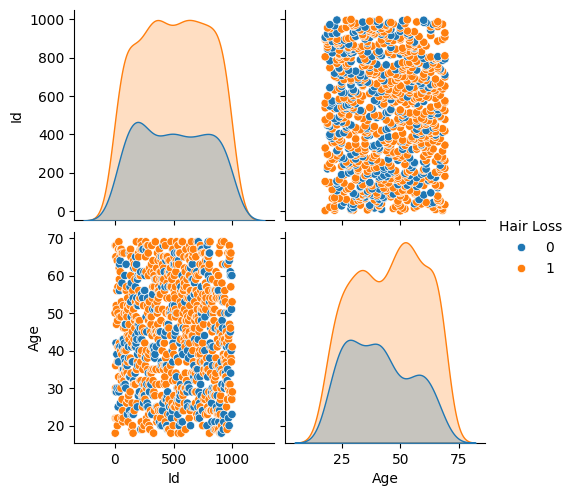

In [6]:
sns.pairplot(df, hue = "Hair Loss")

<Axes: >

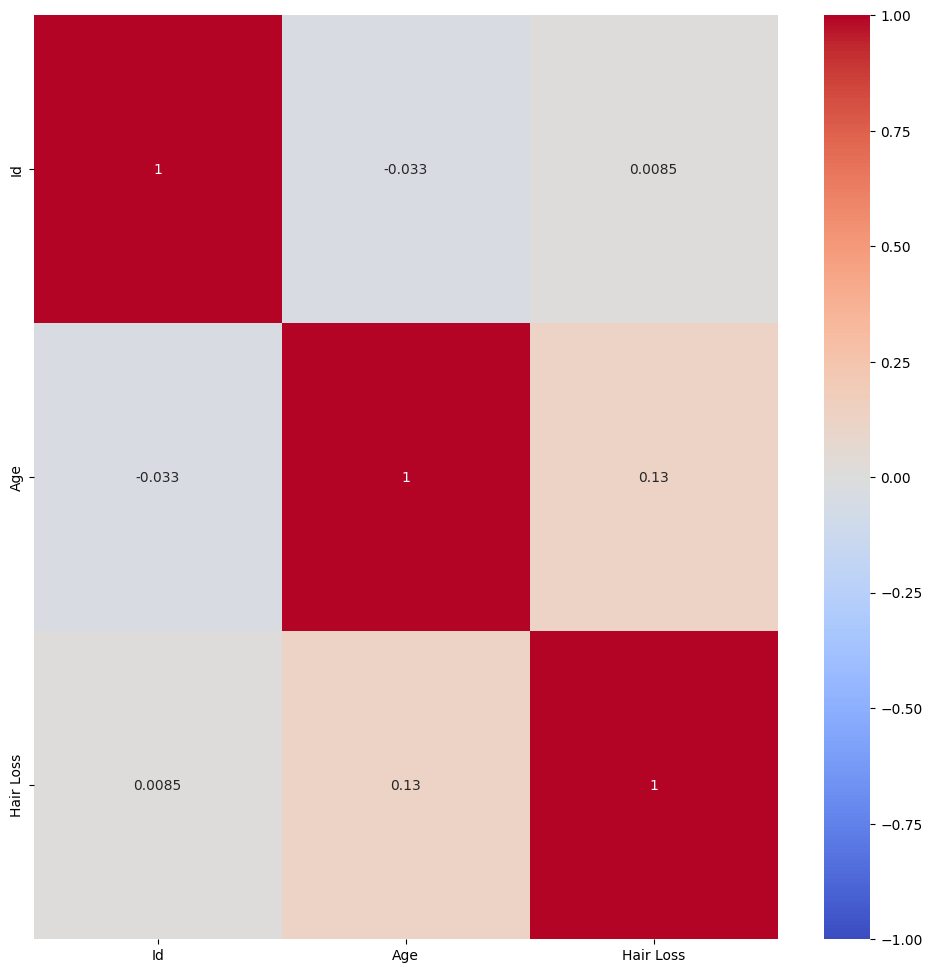

In [7]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1, )

## LIMPIEZA

In [8]:
df_encoded = pd.get_dummies(df, columns=['Genetics', 'Hormonal Changes', 
                                         'Stress', 'Poor Hair Care Habits',
                                         'Environmental Factors','Smoking', 'Weight Loss'])
df_encoded

,Id,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Age,Hair Loss,Genetics_No,Genetics_Yes,Hormonal Changes_No,Hormonal Changes_Yes,Stress_No,Stress_Yes,Poor Hair Care Habits_No,Poor Hair Care Habits_Yes,Environmental Factors_No,Environmental Factors_Yes,Smoking_No,Smoking_Yes,Weight Loss_No,Weight Loss_Yes
0,1,Yes,No,No,50,1,False,True,False,True,False,True,False,True,False,True,True,False,True,False
1,2,Yes,No,No,18,1,True,False,False,True,False,True,True,False,False,True,True,False,True,False
2,3,No,Yes,No,68,1,True,False,True,False,True,False,True,False,False,True,True,False,False,True
3,4,Yes,No,Yes,22,1,False,True,True,False,False,True,False,True,True,False,True,False,True,False
4,5,Yes,No,Yes,30,1,False,True,True,False,True,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,No,No,No,60,0,False,True,True,False,True,False,False,True,True,False,True,False,True,False
996,997,Yes,Yes,Yes,23,0,True,False,True,False,False,True,True,False,True,False,True,False,False,True
997,998,Yes,Yes,Yes,53,1,False,True,False,True,True,False,False,True,True,False,True,False,True,False
998,999,Yes,No,No,41,1,True,False,False,True,False,True,True,False,False,True,True,False,True,False


In [9]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         1000 non-null   int64 
 1   Medical Conditions         1000 non-null   object
 2   Medications & Treatments   1000 non-null   object
 3   Nutritional Deficiencies   1000 non-null   object
 4   Age                        1000 non-null   int64 
 5   Hair Loss                  1000 non-null   int64 
 6   Genetics_No                1000 non-null   bool  
 7   Genetics_Yes               1000 non-null   bool  
 8   Hormonal Changes_No        1000 non-null   bool  
 9   Hormonal Changes_Yes       1000 non-null   bool  
 10  Stress_No                  1000 non-null   bool  
 11  Stress_Yes                 1000 non-null   bool  
 12  Poor Hair Care Habits_No   1000 non-null   bool  
 13  Poor Hair Care Habits_Yes  1000 non-null   bool  
 14  Environme

## VISUALIZACIONES 2

<Axes: >

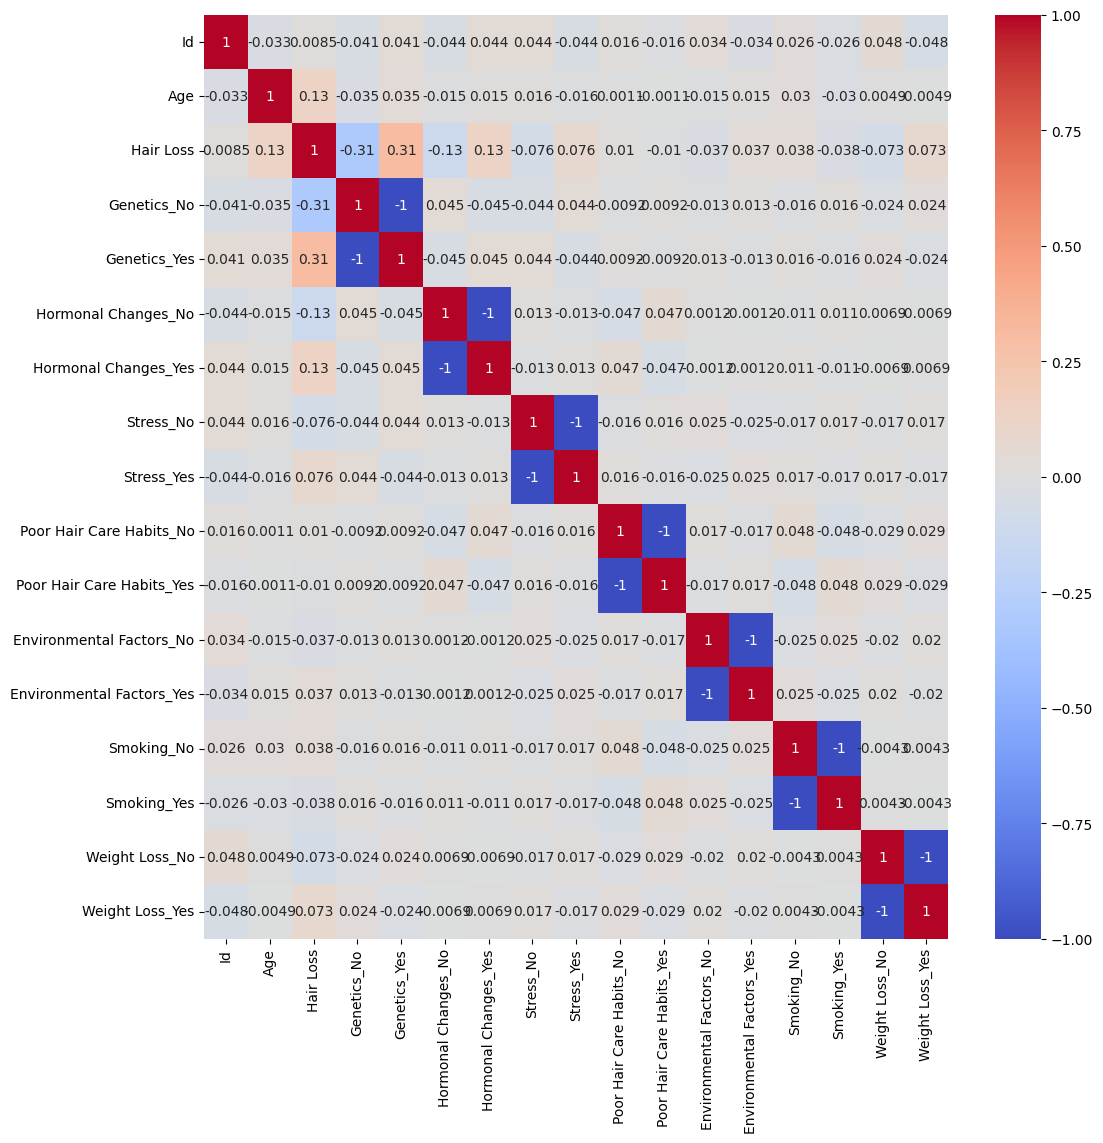

In [10]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_encoded.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1, )

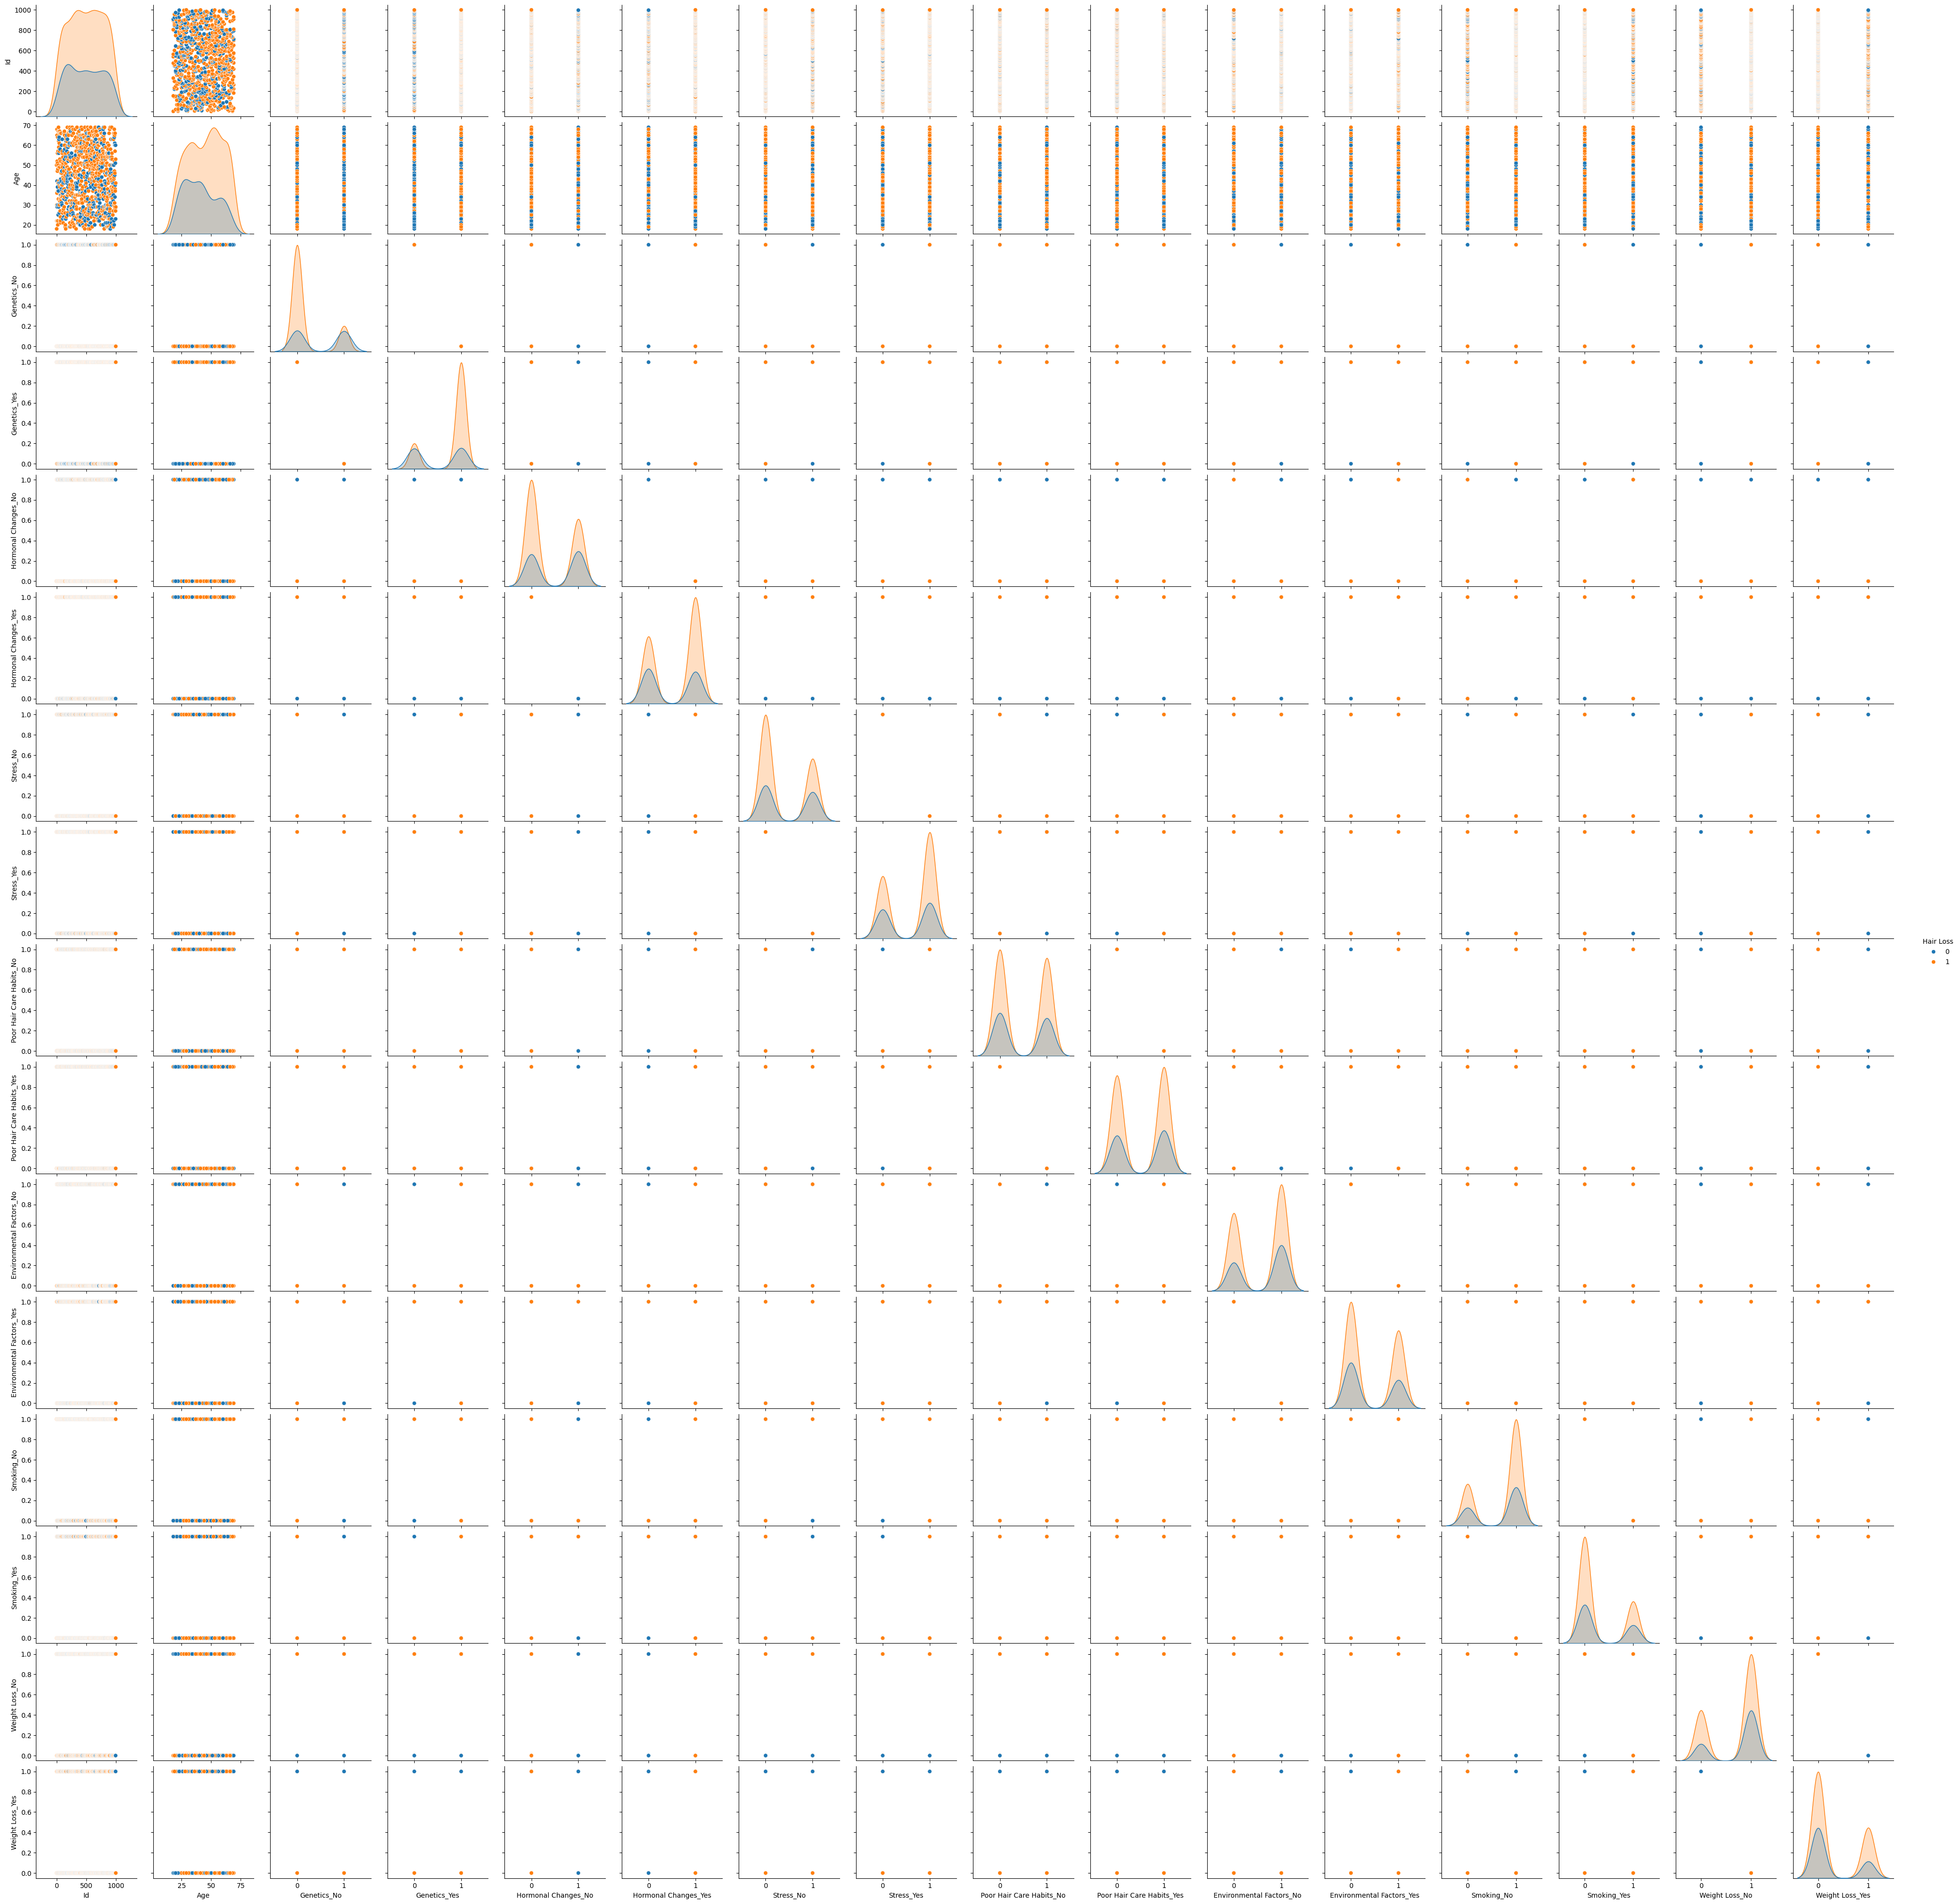

In [11]:
sns.pairplot(df_encoded, hue = "Hair Loss")

## MODELO 1: LOGISTIC REGRESSION

reg log tira linea recta... no tiene sentido aqui

In [12]:
X = df_encoded[["Age","Genetics_No", "Genetics_Yes", 
        "Hormonal Changes_No", "Hormonal Changes_Yes","Stress_No","Stress_Yes", "Poor Hair Care Habits_No", "Poor Hair Care Habits_Yes", "Environmental Factors_No",
        "Environmental Factors_Yes", "Smoking_No", "Smoking_Yes", "Weight Loss_No" , "Weight Loss_Yes"]]
y = df_encoded["Hair Loss"]

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [14]:
predictions = model.predict(X)
print(predictions)

[1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0
 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 

In [15]:
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

[[0.13 0.87]
 [0.56 0.44]
 [0.44 0.56]
 ...
 [0.22 0.78]
 [0.45 0.55]
 [0.25 0.75]]


In [16]:
model.score(X, y)

0.722

## MODELO 2: KNN

NORMALIZAR TB LOS 2 DATOS QUE ME FALTAN